In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("/Users/chipego/Downloads/african-credit-scoring-challenge20241203-14702-1yayxml/Train.csv")

In [8]:
data.head(10)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
5,ID_265607284433267278,265607,Kenya,284433,267278,Type_1,4325.0,4325.0,2022-10-19,2022-10-26,7,Repeat Loan,1297.50,0.300000,1298.0,0
6,ID_261844305920267278,261844,Kenya,305920,267278,Type_1,6735.0,6735.0,2022-11-29,2022-12-06,7,Repeat Loan,2020.50,0.300000,2021.0,0
7,ID_265488287698267278,265488,Kenya,287698,267278,Type_1,1540.0,1562.0,2022-10-25,2022-11-01,7,Repeat Loan,462.00,0.300000,469.0,0
8,ID_268010279432267278,268010,Kenya,279432,267278,Type_1,21496.0,21994.0,2022-10-11,2022-10-18,7,Repeat Loan,0.00,0.000000,0.0,0
9,ID_245399236898267278,245399,Kenya,236898,267278,Type_1,18852.0,18852.0,2022-08-15,2022-08-22,7,Repeat Loan,5655.60,0.300000,5656.0,0


In [10]:
#Check missing values
data.isnull().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [14]:
unique_values = data['loan_type'].unique()
print(unique_values)

['Type_1' 'Type_7' 'Type_5' 'Type_4' 'Type_6' 'Type_14' 'Type_9' 'Type_10'
 'Type_19' 'Type_16' 'Type_2' 'Type_11' 'Type_23' 'Type_18' 'Type_17'
 'Type_12' 'Type_20' 'Type_13' 'Type_21' 'Type_15' 'Type_24' 'Type_22']


In [16]:
#Checking if the data is balanced
data['target'].value_counts()

target
0    67396
1     1258
Name: count, dtype: int64

In [18]:
# Changing datatype of 'disbursement_date' and ' due_date'
data["disbursement_date"] = pd.to_datetime(data["disbursement_date"], 
                                      format="%Y-%m-%d")
data["due_date"] = pd.to_datetime(data["due_date"], 
                                      format="%Y-%m-%d")

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  int64         
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  int64         
 4   lender_id                    68654 non-null  int64         
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  int64         
 11  New_versus_Repeat            68654 non-nu

In [24]:
#Finding duplicates
data.duplicated().sum()

0

In [26]:
#Identifying garbage values (object data type)
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts())
    print("***"*10)

ID
ID_266671248032267278    1
ID_269575262587267278    1
ID_265499248423267278    1
ID_285606357420267278    1
ID_258888298351267278    1
                        ..
ID_252644215952267278    1
ID_248164306035267278    1
ID_263585287888267278    1
ID_243334252949267278    1
ID_249117268933267278    1
Name: count, Length: 68654, dtype: int64
******************************
country_id
Kenya    68654
Name: count, dtype: int64
******************************
loan_type
Type_1     61723
Type_7      2790
Type_5      1521
Type_4      1235
Type_10      466
Type_6       357
Type_9       205
Type_14       99
Type_2        74
Type_11       42
Type_18       30
Type_17       23
Type_12       21
Type_23       18
Type_20       13
Type_16       12
Type_13       10
Type_19        4
Type_15        4
Type_21        3
Type_24        3
Type_22        1
Name: count, dtype: int64
******************************
New_versus_Repeat
Repeat Loan    68087
New Loan         567
Name: count, dtype: int64
******************

In [28]:
#No garbage values

In [30]:
#Exploratory Data Analysis (EDA)

In [34]:
#Descriptive statistics
data.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654,68654,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,2022-10-17 07:55:03.417135360,2022-10-25 20:59:15.638418944,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,2021-10-04 00:00:00,2021-10-21 00:00:00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,2022-08-10 00:00:00,2022-08-17 00:00:00,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,2022-09-16 00:00:00,2022-09-23 00:00:00,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,2022-10-24 00:00:00,2022-10-31 00:00:00,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,2024-11-14 00:00:00,2025-10-27 00:00:00,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,NaN,NaN,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120


In [40]:
data.describe(include="object")

,ID,country_id,loan_type,New_versus_Repeat
count,68654,68654,68654,68654
unique,68654,1,22,2
top,ID_266671248032267278,Kenya,Type_1,Repeat Loan
freq,1,68654,61723,68087


In [42]:
#Understanding the distribution of data


In [ ]:
#Histogram
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data,x=i)
    plt.show()

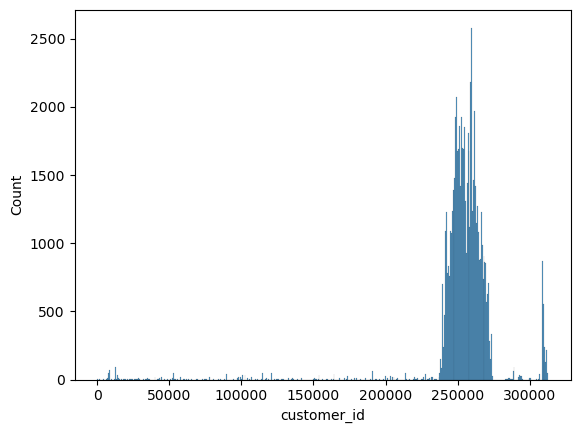

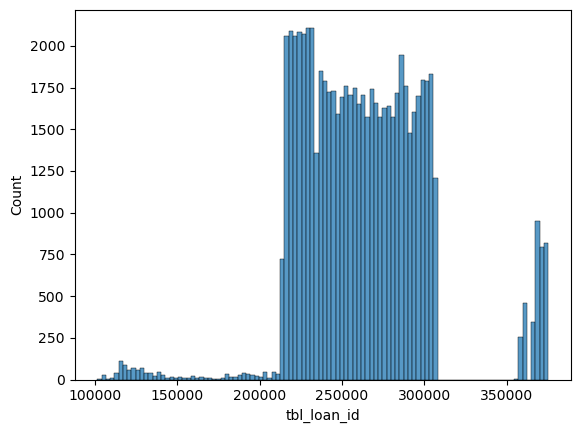

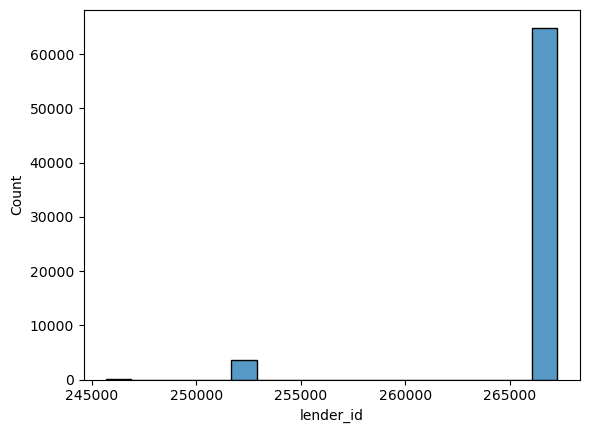

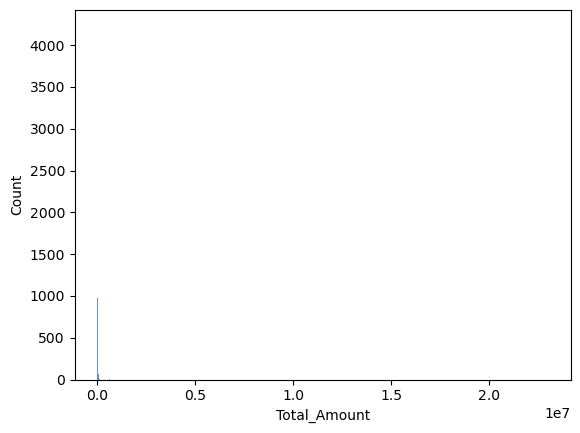

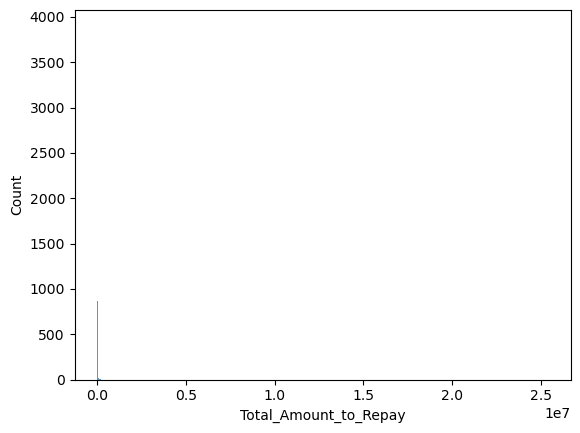

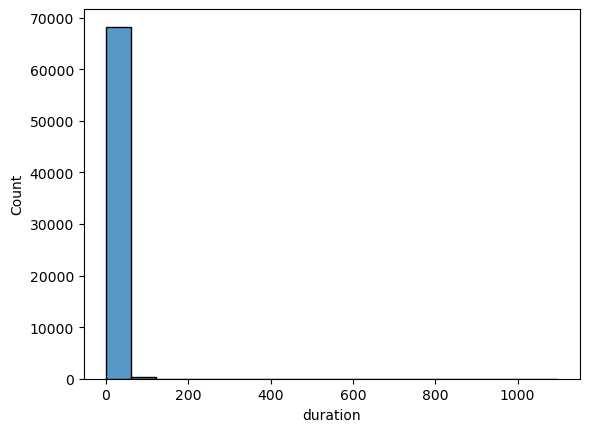

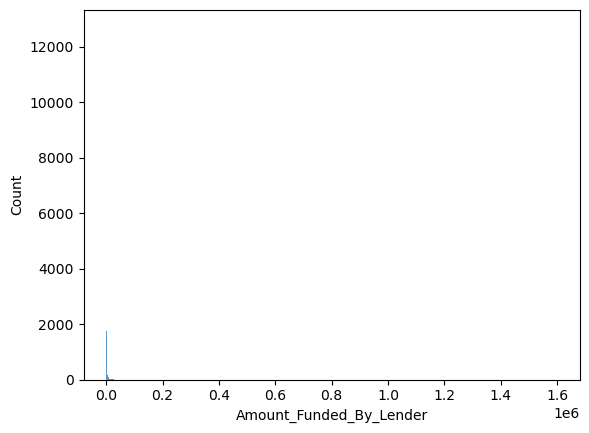

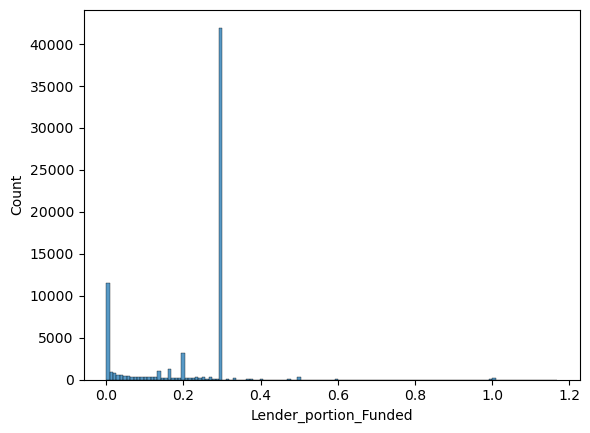

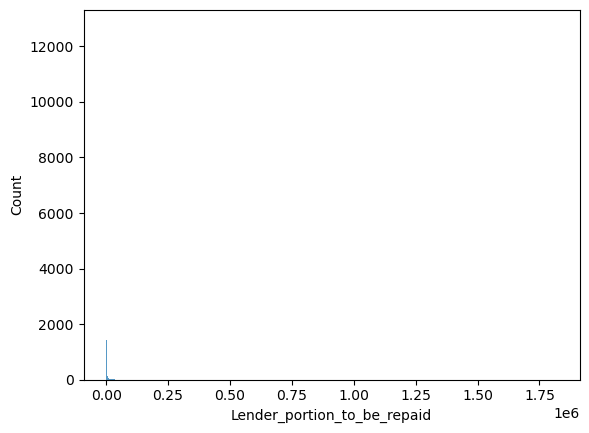

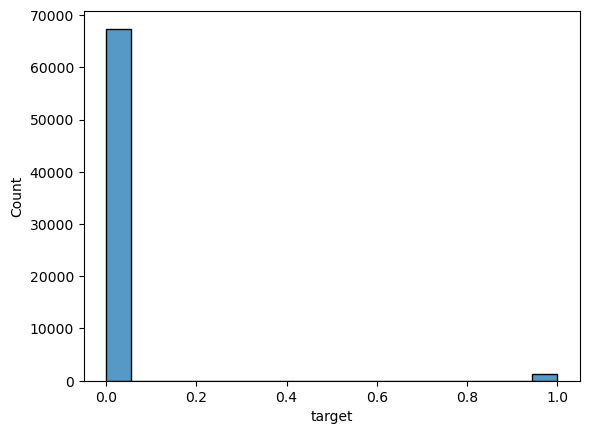

In [49]:
#Histogram
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data,x=i)
    plt.show()

In [58]:
#Scatterplot to understand relationships
data.select_dtypes(include="number").columns

Index(['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount',
       'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender',
       'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

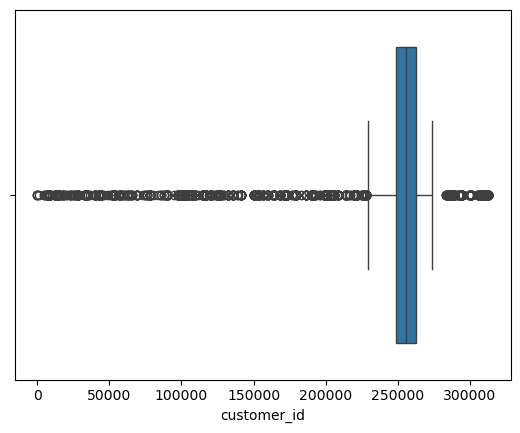

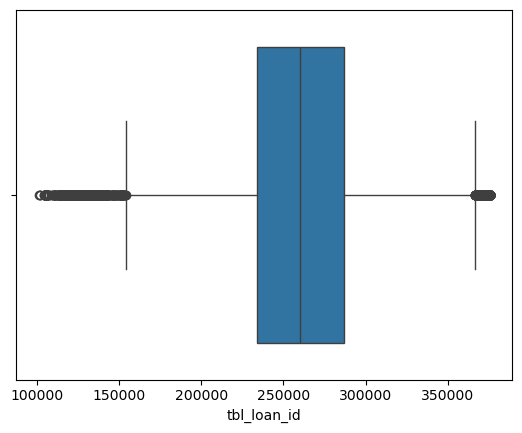

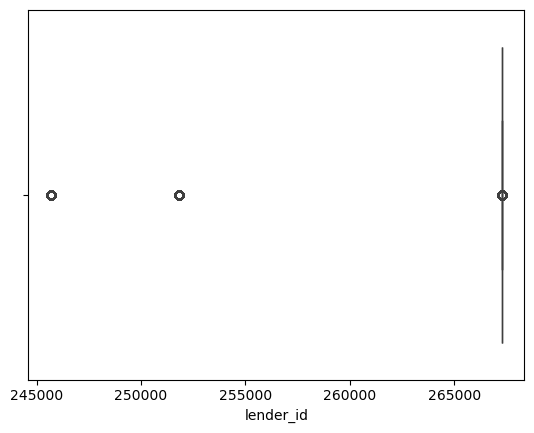

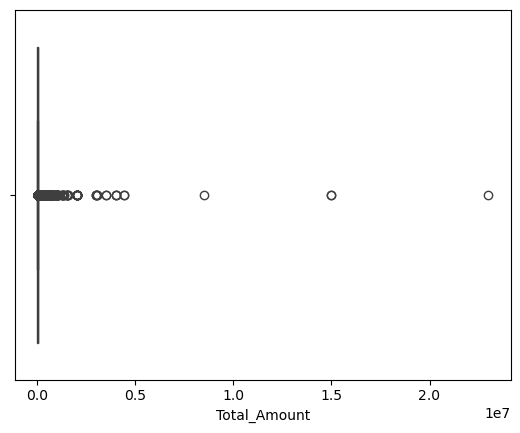

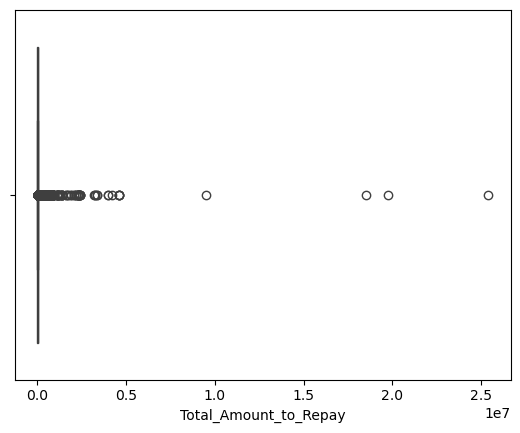

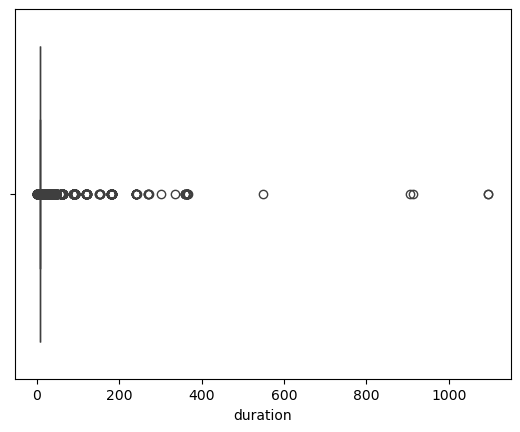

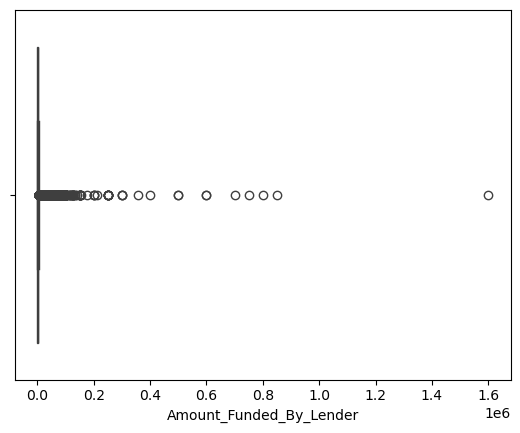

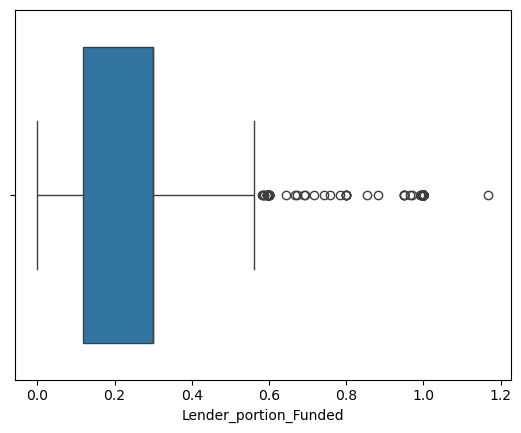

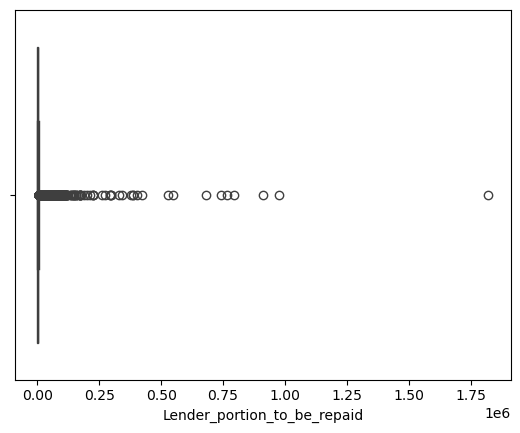

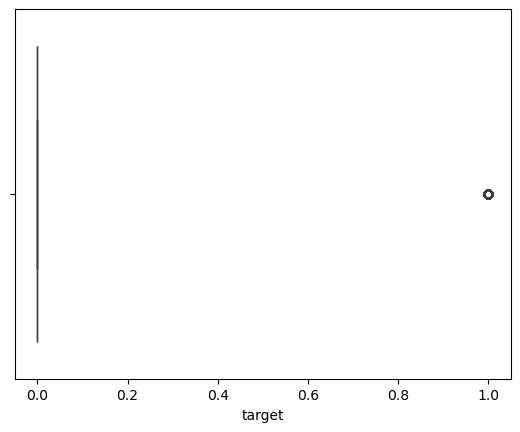

In [51]:
#Boxplot to identify any outliers
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

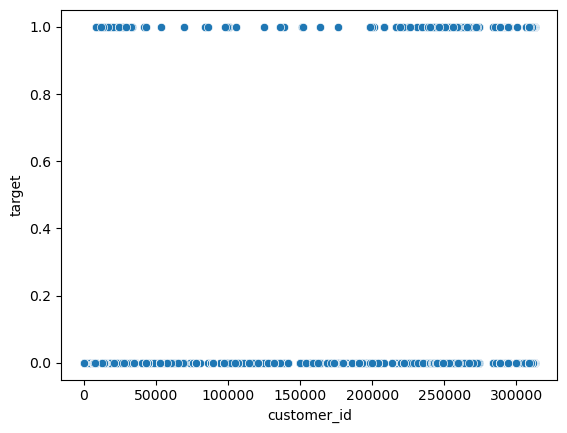

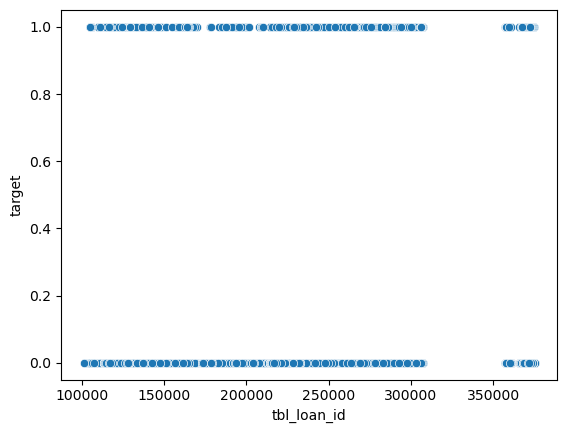

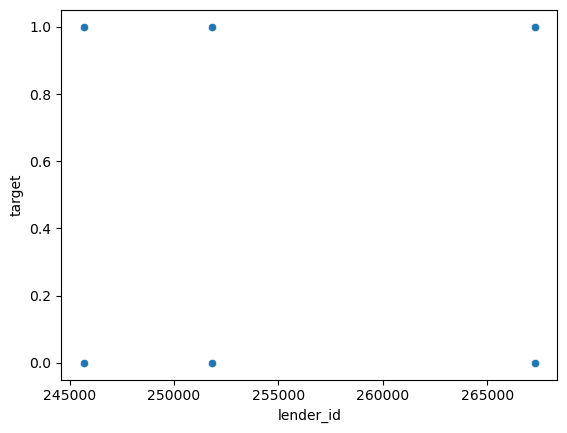

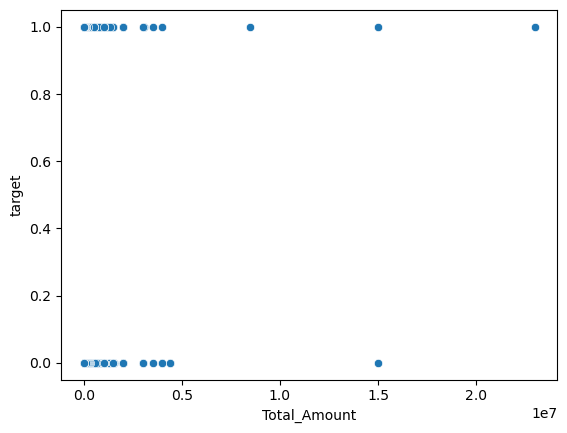

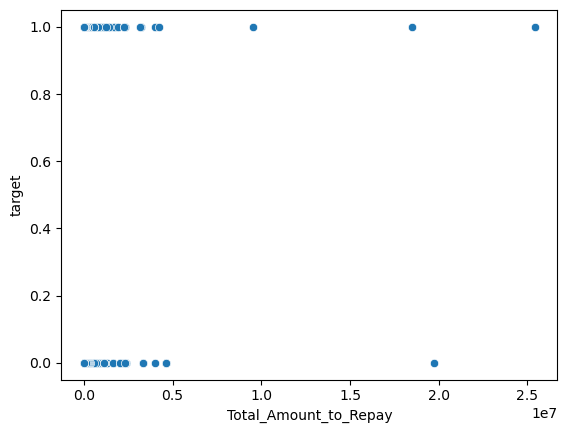

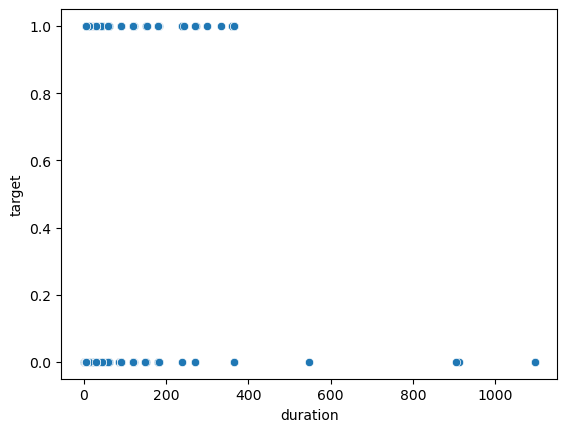

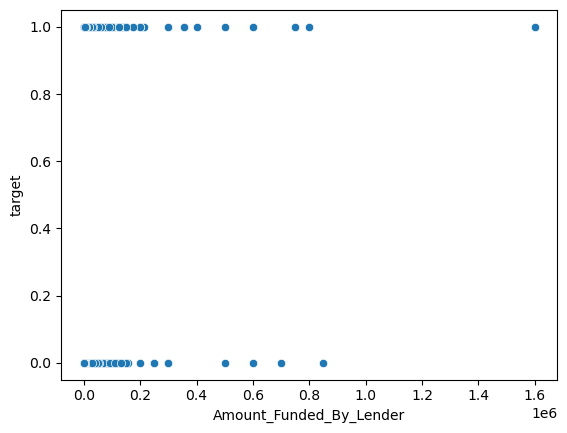

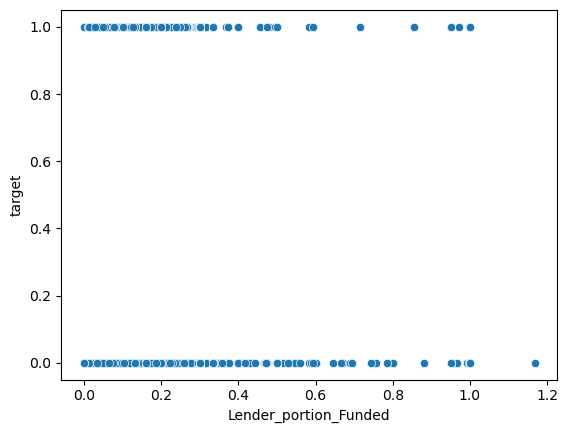

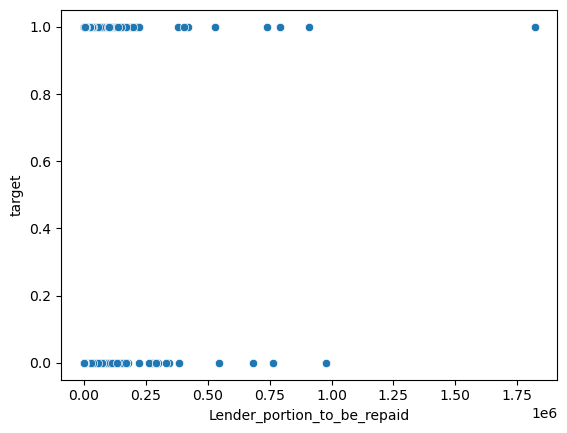

In [60]:
for i in ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount',
       'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender',
       'Lender_portion_Funded', 'Lender_portion_to_be_repaid']:
    sns.scatterplot(data=data,x=i,y='target')
    plt.show()

In [64]:
#To understand the correlation with heatmap to interpret the relationship and multicollinearity.
data.select_dtypes(include="number").corr()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
customer_id,1.000000,0.241670,-0.094086,0.000880,0.001162,-0.005274,-0.004126,-0.031184,-0.003058,0.030659
tbl_loan_id,0.241670,1.000000,-0.099092,0.016275,0.015313,0.059921,0.004764,-0.213029,0.009076,0.035068
lender_id,-0.094086,-0.099092,1.000000,-0.064935,-0.062589,-0.206143,-0.074546,-0.016221,-0.074143,-0.166202
Total_Amount,0.000880,0.016275,-0.064935,1.000000,0.996759,0.354523,0.420987,-0.038000,0.426856,0.086043
Total_Amount_to_Repay,0.001162,0.015313,-0.062589,0.996759,1.000000,0.371108,0.410123,-0.036009,0.418614,0.087089
duration,-0.005274,0.059921,-0.206143,0.354523,0.371108,1.000000,0.364851,-0.019972,0.394855,0.189889
Amount_Funded_By_Lender,-0.004126,0.004764,-0.074546,0.420987,0.410123,0.364851,1.000000,0.093573,0.997542,0.101845
Lender_portion_Funded,-0.031184,-0.213029,-0.016221,-0.038000,-0.036009,-0.019972,0.093573,1.000000,0.085730,0.045418
Lender_portion_to_be_repaid,-0.003058,0.009076,-0.074143,0.426856,0.418614,0.394855,0.997542,0.085730,1.000000,0.109517
target,0.030659,0.035068,-0.166202,0.086043,0.087089,0.189889,0.101845,0.045418,0.109517,1.000000


<Axes: >

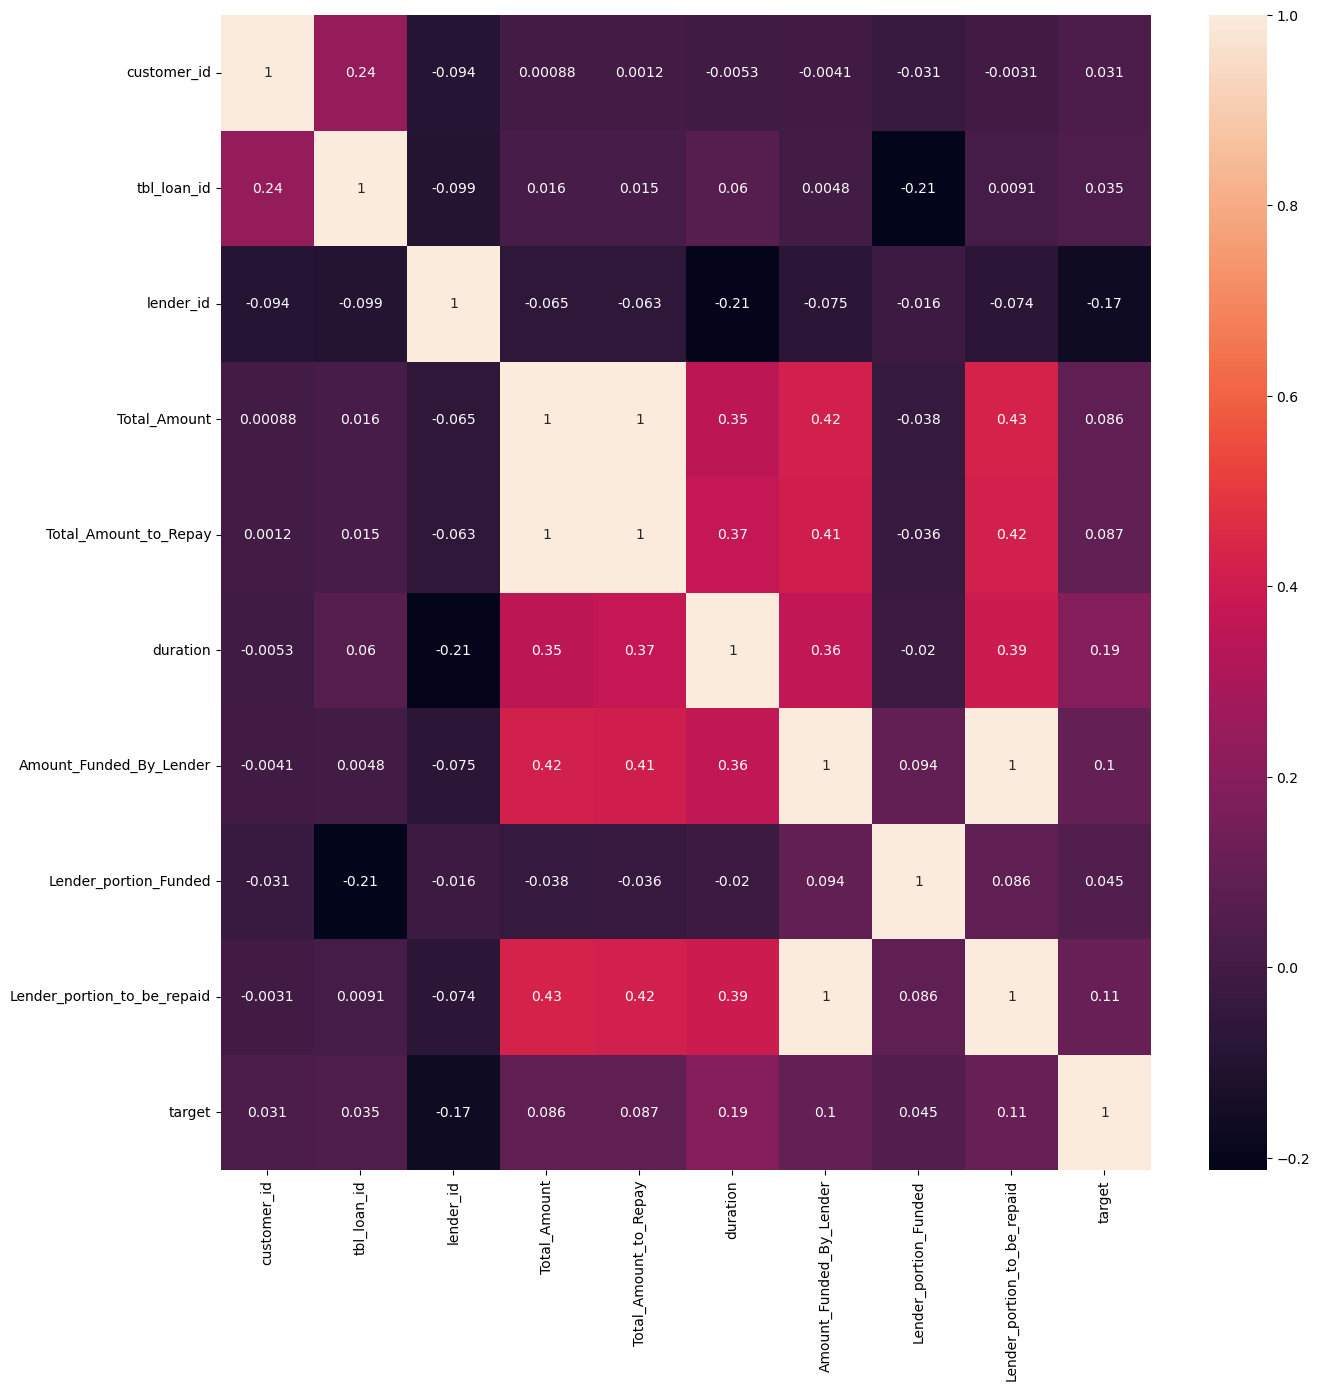

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(data.select_dtypes(include="number").corr(),annot=True)

In [76]:
#Dealing with outliers.
#Outlier treatment is only done for the continuous numerical data
#Therefore,identify continuous numerical variables (not the target variable and not the categorical and discrete variables)
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [82]:
data.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

In [84]:
wisker(data['Total_Amount'])

(-11437.5, 25182.5)

In [94]:
for i in ['Total_Amount', 'Total_Amount_to_Repay','Lender_portion_to_be_repaid']:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

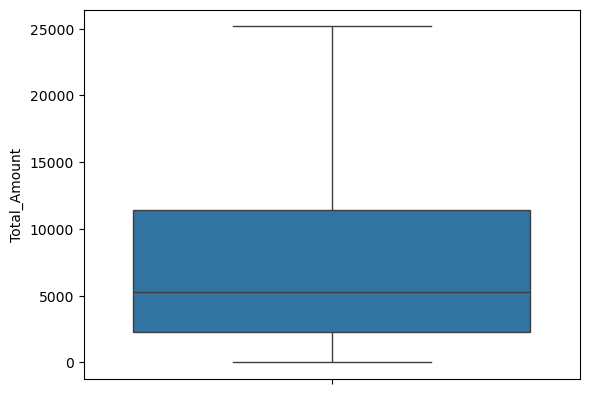

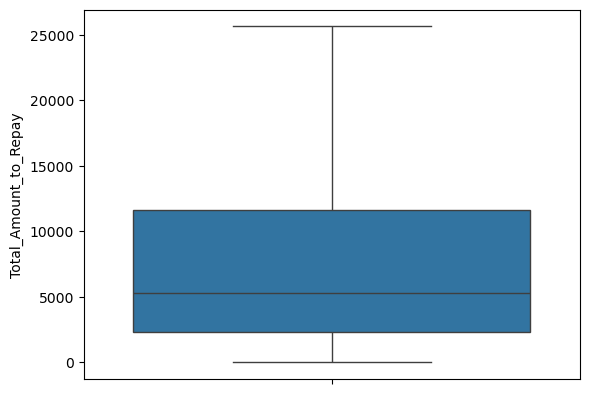

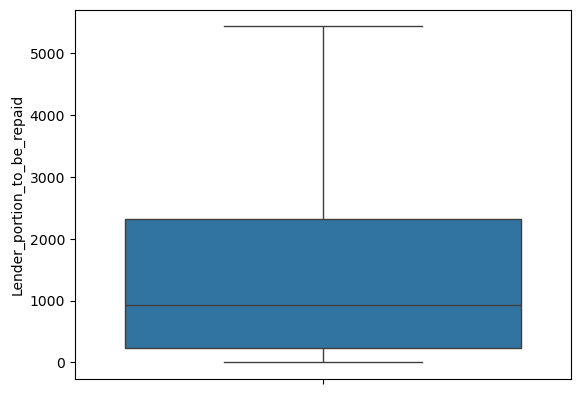

In [96]:
for i in ['Total_Amount', 'Total_Amount_to_Repay','Lender_portion_to_be_repaid']:
    sns.boxplot(data[i])
    plt.show()

In [100]:
data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25182.5,25631.5,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,5434.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [114]:
# One-hot encode the 'New_versus_Repeat' column
encoded_data = pd.get_dummies(data, columns=['New_versus_Repeat','loan_type'])
#drop_first=True to drop the first encoded column becausde it is redundant.

In [118]:
encoded_data

,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,...,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9
0,ID_266671248032267278,266671,Kenya,248032,267278,8448.0,8448.0,2022-08-30,2022-09-06,7,...,False,False,False,False,False,False,False,False,False,False
1,ID_248919228515267278,248919,Kenya,228515,267278,25182.5,25631.5,2022-07-30,2022-08-06,7,...,False,False,False,False,False,False,False,False,False,False
2,ID_308486370501251804,308486,Kenya,370501,251804,6900.0,7142.0,2024-09-06,2024-09-13,7,...,False,False,False,False,False,False,False,False,True,False
3,ID_266004285009267278,266004,Kenya,285009,267278,8958.0,9233.0,2022-10-20,2022-10-27,7,...,False,False,False,False,False,False,False,False,False,False
4,ID_253803305312267278,253803,Kenya,305312,267278,4564.0,4728.0,2022-11-28,2022-12-05,7,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68649,ID_244559228408267278,244559,Kenya,228408,267278,1460.0,1515.0,2022-07-30,2022-08-06,7,...,False,False,False,False,False,False,False,False,False,False
68650,ID_260062217784267278,260062,Kenya,217784,267278,5029.0,5116.0,2022-07-16,2022-07-23,7,...,False,False,False,False,False,False,False,False,False,False
68651,ID_259137216701267278,259137,Kenya,216701,267278,5289.0,5289.0,2022-07-15,2022-07-22,7,...,False,False,False,False,False,False,False,False,False,False
68652,ID_266801303201267278,266801,Kenya,303201,267278,3334.0,3334.0,2022-11-23,2022-11-30,7,...,False,False,False,False,False,False,False,False,False,False


In [124]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             68654 non-null  object        
 1   customer_id                    68654 non-null  int64         
 2   country_id                     68654 non-null  object        
 3   tbl_loan_id                    68654 non-null  int64         
 4   lender_id                      68654 non-null  int64         
 5   Total_Amount                   68654 non-null  float64       
 6   Total_Amount_to_Repay          68654 non-null  float64       
 7   disbursement_date              68654 non-null  datetime64[ns]
 8   due_date                       68654 non-null  datetime64[ns]
 9   duration                       68654 non-null  int64         
 10  Amount_Funded_By_Lender        68654 non-null  float64       
 11  Lender_portion_

In [126]:
test_data = pd.read_csv("/Users/chipego/Downloads/african-credit-scoring-challenge20241203-14702-1yayxml/Test.csv")

In [128]:
test_data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


In [130]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18594 non-null  object 
 1   customer_id                  18594 non-null  int64  
 2   country_id                   18594 non-null  object 
 3   tbl_loan_id                  18594 non-null  int64  
 4   lender_id                    18594 non-null  int64  
 5   loan_type                    18594 non-null  object 
 6   Total_Amount                 18594 non-null  float64
 7   Total_Amount_to_Repay        18594 non-null  float64
 8   disbursement_date            18594 non-null  object 
 9   due_date                     18594 non-null  object 
 10  duration                     18594 non-null  int64  
 11  New_versus_Repeat            18594 non-null  object 
 12  Amount_Funded_By_Lender      18594 non-null  float64
 13  Lender_portion_F

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  int64         
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  int64         
 4   lender_id                    68654 non-null  int64         
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  int64         
 11  New_versus_Repeat            68654 non-nu

In [142]:
test_data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


In [171]:
#Dividing the data into target and predictor variables
#y = encoded_data["target"]
#x = encoded_data.drop(["target","ID","customer_id","country_id","tbl_loan_id","lender_id"],axis=1)

In [175]:
encoded_data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,...,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9
0,ID_266671248032267278,266671,Kenya,248032,267278,8448.0,8448.0,2022-08-30,2022-09-06,7,...,False,False,False,False,False,False,False,False,False,False
1,ID_248919228515267278,248919,Kenya,228515,267278,25182.5,25631.5,2022-07-30,2022-08-06,7,...,False,False,False,False,False,False,False,False,False,False
2,ID_308486370501251804,308486,Kenya,370501,251804,6900.0,7142.0,2024-09-06,2024-09-13,7,...,False,False,False,False,False,False,False,False,True,False
3,ID_266004285009267278,266004,Kenya,285009,267278,8958.0,9233.0,2022-10-20,2022-10-27,7,...,False,False,False,False,False,False,False,False,False,False
4,ID_253803305312267278,253803,Kenya,305312,267278,4564.0,4728.0,2022-11-28,2022-12-05,7,...,False,False,False,False,False,False,False,False,False,False


In [185]:
#sorting out the date variables
#disbursement_date
data['dis_Year'] = data['disbursement_date'].dt.year
data['dis_Month'] = data['disbursement_date'].dt.month
data['dis_Day'] = data['disbursement_date'].dt.day
data['dis_Weekday'] = data['disbursement_date'].dt.weekday


KeyError: 'disbursement_date'

In [179]:
#Drop disbursement_date variable
data = data.drop('disbursement_date', axis=1)


In [187]:
#due_date
data['due_Year'] = data['due_date'].dt.year
data['due_Month'] = data['due_date'].dt.month
data['due_Day'] = data['due_date'].dt.day
data['due_Weekday'] = data['due_date'].dt.weekday

In [191]:
#Drop due date variable
data = data.drop('due_date', axis=1)

In [195]:
data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,duration,New_versus_Repeat,...,Lender_portion_to_be_repaid,target,dis_Year,dis_Month,dis_Day,dis_Weekday,due_Year,due_Month,due_Day,due_Weekday
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,7,Repeat Loan,...,121.0,0,2022,8,30,1,2022,9,6,1
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25182.5,25631.5,7,Repeat Loan,...,5434.0,0,2022,7,30,5,2022,8,6,5
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,7,Repeat Loan,...,1428.0,0,2024,9,6,4,2024,9,13,4
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,7,Repeat Loan,...,2770.0,0,2022,10,20,3,2022,10,27,3
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,7,Repeat Loan,...,1418.0,0,2022,11,28,0,2022,12,5,0


In [203]:
#Drop country_id variable beecause it is redundant
data = data.drop('country_id', axis=1)

In [205]:
# One-hot encode the 'New_versus_Repeat' column
encoded = pd.get_dummies(data, columns=['New_versus_Repeat','loan_type'])
#drop_first=True to drop the first encoded column becausde it is redundant.

In [209]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             68654 non-null  object 
 1   customer_id                    68654 non-null  int64  
 2   tbl_loan_id                    68654 non-null  int64  
 3   lender_id                      68654 non-null  int64  
 4   Total_Amount                   68654 non-null  float64
 5   Total_Amount_to_Repay          68654 non-null  float64
 6   duration                       68654 non-null  int64  
 7   Amount_Funded_By_Lender        68654 non-null  float64
 8   Lender_portion_Funded          68654 non-null  float64
 9   Lender_portion_to_be_repaid    68654 non-null  float64
 10  target                         68654 non-null  int64  
 11  dis_Year                       68654 non-null  int32  
 12  dis_Month                      68654 non-null 

In [213]:
#Dividing the data into target and predictor variables
y = encoded["target"]
x = encoded.drop(["target","ID","customer_id","tbl_loan_id","lender_id"],axis=1)

## Normalize the data

In [215]:
from sklearn.preprocessing import StandardScaler

#Creating a scalar object
scaler = StandardScaler()

#Fit the scalar to the data and transform the data
X_scaled = scaler.fit_transform(x)

In [219]:
X_scaled

array([[ 2.47255181e-02,  3.81972015e-03, -1.15759601e-01, ...,
        -7.22991671e-02, -2.05815487e-01, -5.47259585e-02],
       [ 2.18052520e+00,  2.17324910e+00, -1.15759601e-01, ...,
        -7.22991671e-02, -2.05815487e-01, -5.47259585e-02],
       [-1.74693521e-01, -1.61063730e-01, -1.15759601e-01, ...,
        -7.22991671e-02,  4.85872087e+00, -5.47259585e-02],
       ...,
       [-3.82228451e-01, -3.95006329e-01, -1.15759601e-01, ...,
        -7.22991671e-02, -2.05815487e-01, -5.47259585e-02],
       [-6.34078723e-01, -6.41826502e-01, -1.15759601e-01, ...,
        -7.22991671e-02, -2.05815487e-01, -5.47259585e-02],
       [ 1.86007633e+00,  1.80251384e+00, -1.15759601e-01, ...,
        -7.22991671e-02, -2.05815487e-01, -5.47259585e-02]])

In [236]:
test_data

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.00,1989.00,2022-07-27,2022-08-03,7,Repeat Loan,575.70,0.300000,597.00
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.00,2153.00,2022-11-16,2022-11-23,7,Repeat Loan,0.00,0.000000,0.00
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.00,8304.00,2022-08-24,2022-08-31,7,Repeat Loan,207.00,0.025079,208.00
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.00,3379.00,2022-11-15,2022-11-22,7,Repeat Loan,1013.70,0.300000,1014.00
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.00,120.00,2022-11-10,2022-11-17,7,Repeat Loan,36.00,0.300000,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,7,Repeat Loan,269.41,0.155689,279.77
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,7,Repeat Loan,460.20,0.300000,460.00
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,7,Repeat Loan,178.67,0.130208,178.67
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,7,Repeat Loan,0.00,0.000000,0.00


In [238]:
#Drop country_id variable beecause it is redundant
test_data = test_data.drop('country_id', axis=1)

In [240]:
#Check missing values
test_data.isnull().sum()

ID                             0
customer_id                    0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
dtype: int64

In [242]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18594 non-null  object 
 1   customer_id                  18594 non-null  int64  
 2   tbl_loan_id                  18594 non-null  int64  
 3   lender_id                    18594 non-null  int64  
 4   loan_type                    18594 non-null  object 
 5   Total_Amount                 18594 non-null  float64
 6   Total_Amount_to_Repay        18594 non-null  float64
 7   disbursement_date            18594 non-null  object 
 8   due_date                     18594 non-null  object 
 9   duration                     18594 non-null  int64  
 10  New_versus_Repeat            18594 non-null  object 
 11  Amount_Funded_By_Lender      18594 non-null  float64
 12  Lender_portion_Funded        18594 non-null  float64
 13  Lender_portion_t

In [244]:
# Changing datatype of 'disbursement_date' and ' due_date'
test_data["disbursement_date"] = pd.to_datetime(test_data["disbursement_date"], 
                                      format="%Y-%m-%d")
test_data["due_date"] = pd.to_datetime(test_data["due_date"], 
                                      format="%Y-%m-%d")

In [250]:
#Finding duplicates
test_data.duplicated().sum()

0

In [252]:
#Identifying garbage values (object data type)
for i in test_data.select_dtypes(include="object").columns:
    print(test_data[i].value_counts())
    print("***"*10)

ID
ID_269404226088267278    1
ID_308886371553251804    1
ID_255301269742267278    1
ID_248606262179267278    1
ID_245350123442251804    1
                        ..
ID_262624304900267278    1
ID_250454250793267278    1
ID_268483290156267278    1
ID_249299236798267278    1
ID_248929241821267278    1
Name: count, Length: 18594, dtype: int64
******************************
loan_type
Type_1     13618
Type_3      3039
Type_7       592
Type_2       454
Type_5       298
Type_4       253
Type_6        98
Type_10       96
Type_9        42
Type_8        37
Type_14       17
Type_11       14
Type_18       12
Type_23        6
Type_12        5
Type_24        4
Type_17        3
Type_13        2
Type_22        1
Type_20        1
Type_15        1
Type_21        1
Name: count, dtype: int64
******************************
New_versus_Repeat
Repeat Loan    18425
New Loan         169
Name: count, dtype: int64
******************************


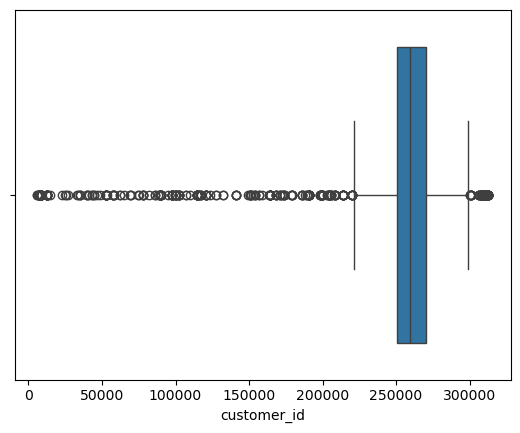

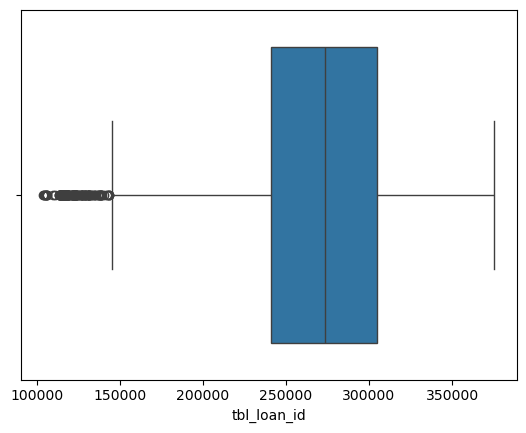

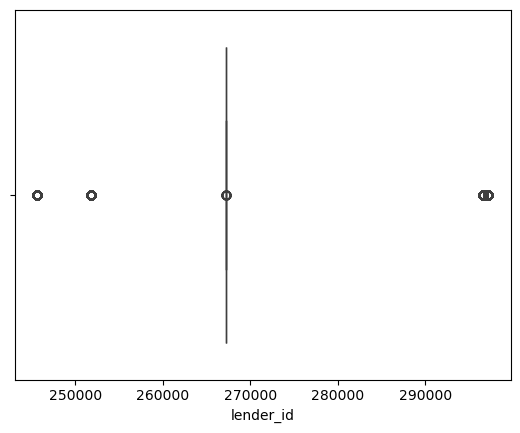

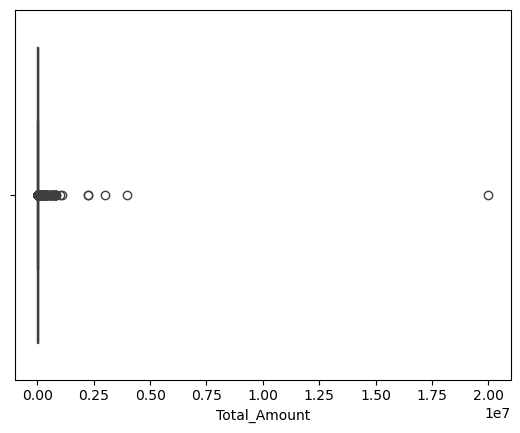

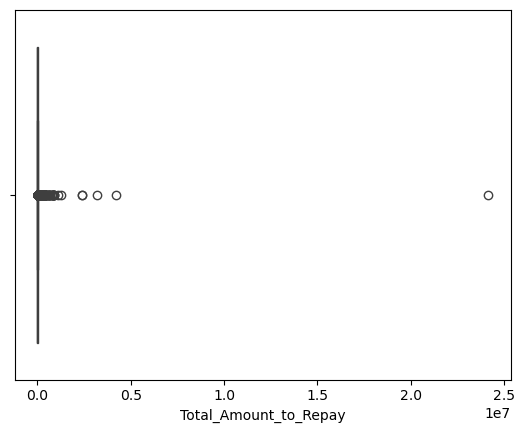

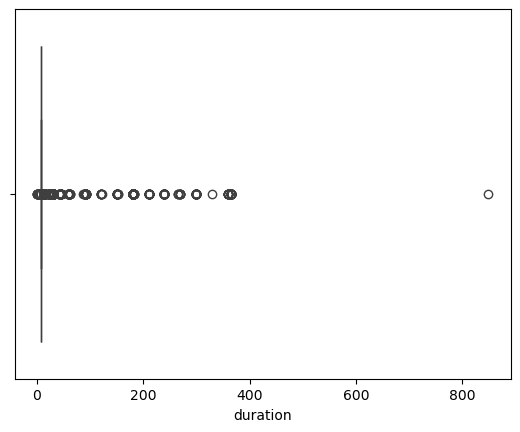

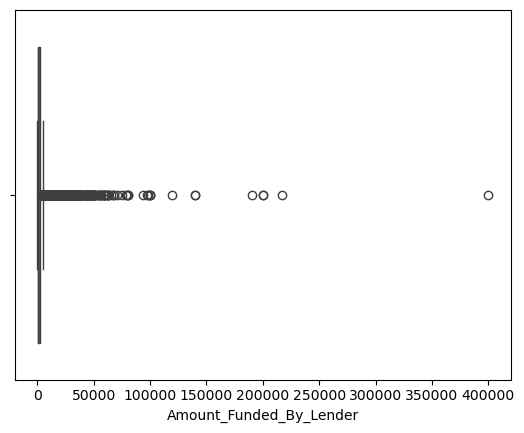

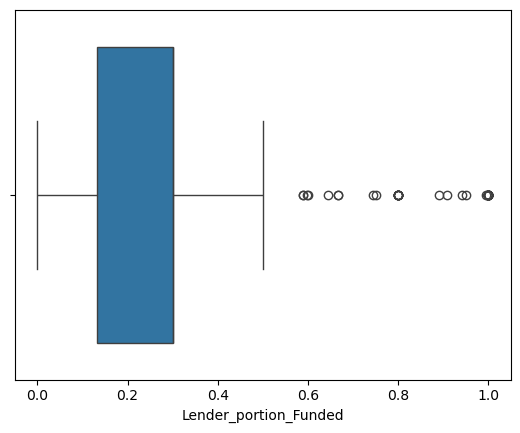

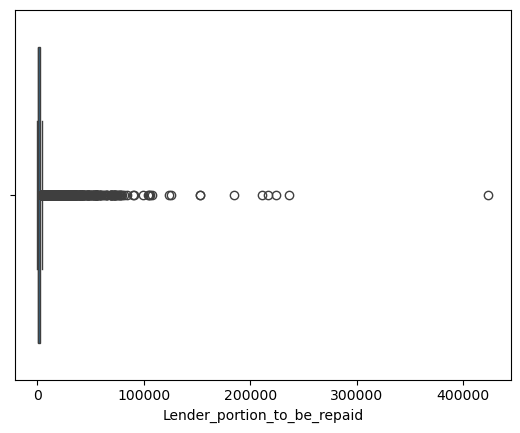

In [254]:
#Boxplot to identify any outliers
for i in test_data.select_dtypes(include="number").columns:
    sns.boxplot(data=test_data,x=i)
    plt.show()

In [256]:
#Dealing with the outliers
for i in ['Total_Amount', 'Total_Amount_to_Repay','Lender_portion_to_be_repaid']:
    lw,uw=wisker(test_data[i])
    test_data[i]=np.where(test_data[i]<lw,lw,test_data[i])
    test_data[i]=np.where(test_data[i]>uw,uw,test_data[i])

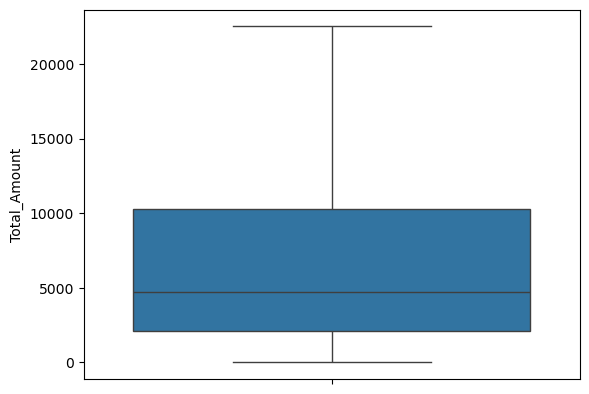

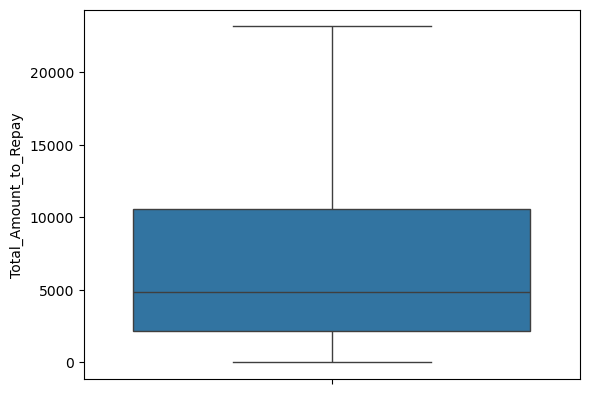

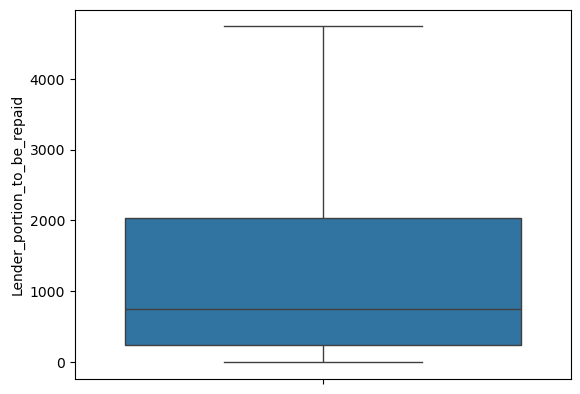

In [258]:
for i in ['Total_Amount', 'Total_Amount_to_Repay','Lender_portion_to_be_repaid']:
    sns.boxplot(test_data[i])
    plt.show()

In [260]:
#sorting out the date variables
#disbursement_date
test_data['dis_Year'] = test_data['disbursement_date'].dt.year
test_data['dis_Month'] = test_data['disbursement_date'].dt.month
test_data['dis_Day'] = test_data['disbursement_date'].dt.day
test_data['dis_Weekday'] = test_data['disbursement_date'].dt.weekday

In [262]:
#Drop disbursement date variable
test_data = test_data.drop('disbursement_date',axis=1)

In [264]:
#due_date
test_data['due_Year'] = test_data['due_date'].dt.year
test_data['due_Month'] = test_data['due_date'].dt.month
test_data['due_Day'] = test_data['due_date'].dt.day
test_data['due_Weekday'] = test_data['due_date'].dt.weekday

In [266]:
#Drop disbursement date variable
test_data = test_data.drop('due_date',axis=1)

In [268]:
# One-hot encode the 'New_versus_Repeat' column
test_encoded = pd.get_dummies(test_data, columns=['New_versus_Repeat','loan_type'])
#drop_first=True to drop the first encoded column becausde it is redundant.

In [270]:
test_encoded.head()

,ID,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,...,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_3,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_8,loan_type_Type_9
0,ID_269404226088267278,269404,226088,267278,1919.0,1989.0,7,575.7,0.300000,597.0,...,False,False,False,False,False,False,False,False,False,False
1,ID_255356300042267278,255356,300042,267278,2138.0,2153.0,7,0.0,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
2,ID_257026243764267278,257026,243764,267278,8254.0,8304.0,7,207.0,0.025079,208.0,...,False,False,False,False,False,False,False,False,False,False
3,ID_264617299409267278,264617,299409,267278,3379.0,3379.0,7,1013.7,0.300000,1014.0,...,False,False,False,False,False,False,False,False,False,False
4,ID_247613296713267278,247613,296713,267278,120.0,120.0,7,36.0,0.300000,36.0,...,False,False,False,False,False,False,False,False,False,False


In [274]:
xx_test = test_encoded.drop(["ID","customer_id","tbl_loan_id","lender_id"],axis=1)

## Normalize the test_data

In [277]:
#Fit the scalar to the data and transform the data
X_scaled_test = scaler.fit_transform(xx_test)

In [279]:
X_scaled_test

array([[-0.78103646, -0.77434399, -0.17923759, ..., -0.18134287,
        -0.04465262, -0.04758053],
       [-0.75013223, -0.75183585, -0.17923759, ..., -0.18134287,
        -0.04465262, -0.04758053],
       [ 0.11292856,  0.09235679, -0.17923759, ..., -0.18134287,
        -0.04465262, -0.04758053],
       ...,
       [-0.85819686, -0.85335581, -0.17923759, ..., -0.18134287,
        -0.04465262, -0.04758053],
       [-0.26046236, -0.25391179, -0.17923759, ..., -0.18134287,
        -0.04465262, -0.04758053],
       [-0.48201328, -0.49312944, -0.17923759, ..., -0.18134287,
        -0.04465262, -0.04758053]])

## Applying SMOTE to balance the target variable

In [282]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [284]:
m_x,m_y = smote.fit_resample(x,y)

In [286]:
m_y

0         0
1         0
2         0
3         0
4         0
         ..
134787    1
134788    1
134789    1
134790    1
134791    1
Name: target, Length: 134792, dtype: int64

In [292]:
m_y.value_counts()

target
0    67396
1    67396
Name: count, dtype: int64

In [294]:
m_x

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,dis_Year,dis_Month,dis_Day,dis_Weekday,...,loan_type_Type_20,loan_type_Type_21,loan_type_Type_22,loan_type_Type_23,loan_type_Type_24,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_9
0,8448.000000,8448.000000,7,120.850000,0.014305,121.000000,2022,8,30,1,...,False,False,False,False,False,False,False,False,False,False
1,25182.500000,25631.500000,7,7768.500000,0.300000,5434.000000,2022,7,30,5,...,False,False,False,False,False,False,False,False,False,False
2,6900.000000,7142.000000,7,1380.000000,0.200000,1428.000000,2024,9,6,4,...,False,False,False,False,False,False,False,False,True,False
3,8958.000000,9233.000000,7,2687.400000,0.300000,2770.000000,2022,10,20,3,...,False,False,False,False,False,False,False,False,False,False
4,4564.000000,4728.000000,7,1369.200000,0.300000,1418.000000,2022,11,28,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134787,16583.408818,22080.874933,7,4975.022645,0.300000,5434.000000,2022,10,19,1,...,False,False,False,False,False,False,False,False,False,False
134788,7604.829570,9693.520495,10,1176.734119,0.154261,1494.646004,2022,9,19,4,...,False,False,False,False,False,True,False,False,False,False
134789,1442.926061,2265.833637,7,432.877818,0.300000,679.944546,2022,8,23,4,...,False,False,False,False,False,False,False,False,False,False
134790,5000.000000,5476.578755,7,1000.000000,0.200000,1094.939822,2024,8,21,2,...,False,False,False,False,False,False,False,False,True,False


## Train the logostic Regression model

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(m_x, m_y, test_size=0.30, random_state=42)

In [301]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = lr.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))Evaluate the model

In [303]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [307]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     20354
           1       0.92      0.85      0.89     20084

    accuracy                           0.89     40438
   macro avg       0.89      0.89      0.89     40438
weighted avg       0.89      0.89      0.89     40438

